<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB4-10%20Biomedical%20Images%20and%20Pytorch_(V).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biomedical Images and Pytorch IV:
# Transfer Learning



>**NOTE**: We are going to use a pre-trained network ([ResNet50](https://blog.roboflow.com/what-is-resnet-50/)) to modify its last layer in order to classify our dataset. We'll see how by using a powerful technique called [transfer learning](https://developers.google.com/machine-learning/glossary#transfer-learning).

## 1. **Introduction**



### What is Transfer Learning?

We've built a few models by hand so far. But their performance has been poor. *`You might be thinking, is there a well-performing model that already exists for our problem?`*

**`And in the world of deep learning, the answer is often yes.`**

**[Transfer learning](https://www.learnpytorch.io/06_pytorch_transfer_learning/)** is a machine learning technique where `a model developed for a particular task is reused as the starting point for a model on a different but related task`. This approach *`leverages the knowledge gained from solving one problem to help solve another problem`*, often resulting in improved performance and reduced training time.



### Key Concepts in Transfer Learning:

1. **`Pre-trained Models`**: In transfer learning, *`a model is often pre-trained on a large dataset (like ImageNet for image recognition) and then fine-tuned on a smaller, task-specific dataset`*. The pre-trained model has already learned general features that can be useful for many related tasks.

2. **`Fine-Tuning`**: This involves *`taking a pre-trained model and training it further on a new, smaller dataset`*. The lower layers of the network, which capture more generic features, are usually left unchanged, while the upper layers, which are more task-specific, are modified to better suit the new task.

3. **`Feature Extraction`**: In some cases, *`rather than retraining the entire model, only the features learned by the pre-trained model are used`*. These features are then fed into a new model (such as a classifier) that is trained on the new task.

4. **`Domain Adaptation`**: Transfer learning *`often involves adapting a model trained in one domain (e.g., medical images) to perform well in another domain (e.g., satellite images)`*. The model needs to adjust to different data distributions or feature spaces.



### Applications of Transfer Learning:

- **`Computer Vision`**: Transfer learning is widely used in *image classification, object detection, and segmentation tasks*, where models pre-trained on large datasets like ImageNet are fine-tuned for specific applications.
  
- **`Natural Language Processing (NLP)`**: Models like BERT and GPT are pre-trained on vast text corpora and then fine-tuned for tasks such as *sentiment analysis, question answering, or language translation*.

- **`Speech Recognition`**: Pre-trained models can be adapted to recognize *different accents or dialects* by fine-tuning on smaller datasets.



### Advantages of Transfer Learning:

- **`Reduced Training Time`**: Since the model starts with pre-learned features, it requires *`less time to converge`* on the new task.
  
- **`Better Performance`**: Transfer learning can improve the performance of models, especially when the *`new dataset is small`*.

- **`Resource Efficiency`**: It allows models to be trained with fewer computational resources since *`not all layers of the network need to be retrained`*.

In summary, transfer learning enables models to learn new tasks more efficiently by leveraging the knowledge gained from previously learned tasks, making it a powerful tool in machine learning, particularly when data or computational resources are limited.



### Where to find pretrained models

Pre-trained models can be found on various platforms, repositories, and libraries that cater to different machine learning tasks, such as computer vision, natural language processing (NLP), and more. *Below are some popular sources for pre-trained models*:



#### 1. **Model Zoos and Libraries**

- **`TensorFlow Hub`**:
  - **`URL`**: [tfhub.dev](https://tfhub.dev/)
  - **`Description`**: TensorFlow Hub provides a vast repository of pre-trained models that can be easily integrated into TensorFlow projects. Models cover areas like image classification, text embeddings, and more.

- **PyTorch Hub**:
  - **`URL`**: [pytorch.org/hub](https://pytorch.org/hub/)
  - **`Description`**: PyTorch Hub offers a variety of pre-trained models in areas such as vision, language, and speech. Models can be directly loaded and fine-tuned within the PyTorch framework.

- **Hugging Face Model Hub**:
  - **`URL`**: [huggingface.co/models](https://huggingface.co/models)
  - **`Description`**: Hugging Face is the go-to platform for NLP models, offering pre-trained models for tasks like text classification, translation, question answering, and more. It also hosts models for vision and other modalities.

- **Keras Applications**:
  - **`URL`**: [Keras Applications](https://keras.io/api/applications/)
  - **`Description`**: Keras provides a set of popular pre-trained models for image classification tasks, including models like VGG16, ResNet, and InceptionV3, which can be easily imported and fine-tuned.




#### 2. **GitHub Repositories**

- **`Model-Specific Repositories`**: Many researchers and organizations release their pre-trained models on GitHub. Examples include:
  - **[`OpenAI`](https://github.com/openai)**: For models like GPT and CLIP.
  - **[`Facebook AI Research (FAIR)`](https://github.com/facebookresearch)**: For models like RoBERTa, Mask R-CNN, etc.



#### 3. **Online Platforms and Marketplaces**

- **Google Cloud Vertex AI**:
  - **`URL`**: [`vertex-ai`](https://cloud.google.com/vertex-ai/?hl=es)
  - **`Description`**: Google Cloud Vertex AI provides access to pre-trained models and pipelines for various tasks, including vision and NLP, which can be deployed on Google Cloud infrastructure.

- **AWS Marketplace**:
  - **`URL`**: [`aws.amazon.com/marketplace`](https://aws.amazon.com/marketplace)
  - **`Description`**: AWS Marketplace offers machine learning models that can be integrated into Amazon's cloud services, including pre-trained models for image recognition, NLP, and more.

- **Microsoft Azure AI Gallery**:
  - **`URL`**: [`gallery.azure.ai`](https://gallery.azure.ai/)
  - **`Description`**: Azure AI Gallery provides pre-trained models and solutions that can be deployed on Microsoft Azure for various tasks, including predictive analytics, NLP, and computer vision.



#### 4. **Research Paper Repositories**

- **Papers with Code**:
  - **`URL`**: [`paperswithcode.com`](https://paperswithcode.com/)
  - **`Description`**: This platform links machine learning papers with their code implementations and often provides pre-trained models. It's a great resource for finding state-of-the-art models.



#### 5. **Specialized Repositories**

- **Model Zoo for Object Detection (Detectron2)**:
  - **`URL`**: [`Detectron2 Model Zoo`](https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md)
  - **`Description`**: Facebook AI Research's Detectron2 provides a model zoo with pre-trained models for object detection and segmentation tasks.

- **Open Model Zoo (Intel OpenVINO)**:
  - **`URL`**: [`Open Model Zoo`](https://github.com/openvinotoolkit/open_model_zoo)
  - **`Description`**: The Open Model Zoo offers a collection of pre-trained models optimized for Intel hardware, suitable for tasks like computer vision and NLP.

These sources should cover most use cases for obtaining pre-trained models across different domains.

### Transfern Learning: Feature Extraction vs Fine-Tuning
`Feature Extraction and Fine-Tuning` are related concepts in transfern learning, but they differ in their approach and purpose. Here’s an explanation of the difference between the two:



#### **_Feature Extraction_**
`Feature Extraction` is a technique where a model trained on one task or domain is reused for a different but related task or domain. The main idea is to *`leverage the knowledge gained from the original task to improve performance on the new task, particularly when the new task has a limited amount of data`*.

- **How it works**:
  - You start with a *`pre-trained model`*, such as ResNet-50 trained on ImageNet.
  - The *`initial layers (backbone) of the model are typically retained`* because they capture general features of the domain (e.g., edges, textures, etc., in images).
  - Only *`the final layers (head) are modified, usually by replacing the output layer`* to match the specific classes of the new task.

- **Advantages**:
  - Reduces training time.
  - Requires less data for training.
  - Improves performance, especially in tasks with limited data.



#### **_Fine-Tuning_**
`Fine-Tuning` is a specific type of transfer learning, but with a more detailed approach. In fine-tuning, *`you not only reuse the pre-trained model but also allow some or all of the layers of the model to be retrained on the new dataset`*. This allows the model to adjust its parameters more precisely for the new task.

- **How it works**:
  - You take a *`pre-trained model and replace the output layer to match the new classification task`*.
  - Instead of keeping all layers "frozen" (not trainable), *`some or all layers of the model are retrained`* with a smaller, task-specific dataset.
  - Typically, *`layers closer to the output are trained more aggressively, while earlier layers might be trained with a lower learning rate or kept frozen`*.

- **Advantages**:
  - Allows the model to adapt more closely to the specific features of the new dataset.
  - Can further improve performance if the new dataset is significantly different from the original dataset.



#### **Key Comparison**:
- **Feature Extraction**: A general approach where a `pre-trained model is reused, often with only the final layers retrained or the output layer replaced`.
- **Fine-Tuning**: A more specific technique within transfer learning that involves `retraining (or adjusting) the entire model or part of the model to better fit the new task, allowing for greater customization and fine-tuning`.

In summary,  
- **`transfer learning`**` refers to the overall process of using a pre-trained model for a new task`, where
- **`feature extraction`**` is a general approach with the output layer replaced and don't retrained` while
- **`fine-tuning`**` involves more detailed retraining of the model to optimize its performance on that specific task`.

>***NOTE*: In this notebook, transfer learning will be performed. A pre-trained model (ResNet50) will be used, and its last layers will be adjusted to learn how to classify images from the new dataset.**
>
>**Fine-tuning is a specific technique within transfer learning where not only the last layer is retrained, but also some of the previous layers of the pre-trained model. In this case, only the last fully connected layer (model_ft.fc) will be modified, so it will be considered feature extraction and not fine-tuning.**

## 2. **Setting our workspace up**



First, we check if GPU is connected. The `nvidia-smi` command (NVIDIA System Management Interface) is used to monitor and manage NVIDIA GPUs (Graphics Processing Units) in a system. It provides detailed information about the status and performance of the GPUs, including GPU utilization, temperature, memory usage, processes utilizing the GPU, and more.

**[`nvidia-smi`](https://www.baeldung.com/linux/nvidia-smi-full-gpu-details)** is a command-line utility provided by NVIDIA that helps you manage and monitor NVIDIA GPU devices. It stands for NVIDIA System Management Interface.



---
**Display Basic GPU Information**

---

In [1]:
!nvidia-smi

Fri Sep 13 07:54:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Setting our workspace: `/content` and `/content/datasets`




---
**Setting our Home**

---



We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'datasets' directory, so all datasets are easily accessible for any project.

In [2]:
# Setting our $HOME to /content

import os
HOME = os.getcwd()
print(HOME)

/content



---
**Mount Google Drive**

---

Next, it imports the drive module from the google.colab library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. **Load a dataset (dataloader)**



---
**Create a directory where we can save our dataset**

---


Create the dataset directory (if it doesn't exist), where we are going to save the dataset with which we are going to train our CNN.


In [4]:
import os
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content


---
**Change to new directory datasets**

---

In [5]:
%%time

# Change to new datasets folder
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())
if  not os.path.isfile('exp4val.zip'):
  !wget -q https://www.dropbox.com/s/nzrvuoos7sgl5dh/exp4val.zip
  !unzip -qq -o exp4val.zip

dataset_dir = /content/datasets
CPU times: user 56.3 ms, sys: 2.78 ms, total: 59.1 ms
Wall time: 7.14 s


### Inspect the Dataset: Skin lesion recognition in 7 classes:



The dataset contains several thousand photos of cell images in seven subdirectories (classes) with one cell image per class. The directory structure is as follows thanks to this snipet:



*  0: 'akiec' - actinic keratosis

*  1: 'bcc' - basal cell carcinoma

*  2: 'bkl' - benign keratosis

*  3: 'df' - dermatofibroma

*  4: 'mel' - melanoma

*  5: 'nv' - melanocytic nevus

*  6: 'vasc' - vascular lesion




---
**Display the datapath structure.**

---

In [6]:
import os

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + os.path.basename(root_dir))

    if os.path.isdir(root_dir):
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                print_directory_tree(item_path, level + 1)

# Define the data directory
data_dir = datasets_dir

# Print the directory tree
print_directory_tree(data_dir)

datasets
    |-- test
        |-- class_6
        |-- class_4
        |-- class_5
        |-- class_1
        |-- class_3
        |-- class_0
        |-- class_2
    |-- __MACOSX
        |-- test
            |-- class_1
        |-- val
            |-- class_0
        |-- train
            |-- class_6
            |-- class_4
            |-- class_5
            |-- class_1
            |-- class_3
            |-- class_0
            |-- class_2
    |-- val
        |-- class_6
        |-- class_4
        |-- class_5
        |-- class_1
        |-- class_3
        |-- class_0
        |-- class_2
    |-- train
        |-- class_6
        |-- class_4
        |-- class_5
        |-- class_1
        |-- class_3
        |-- class_0
        |-- class_2


In [7]:
!apt-get install -q tree

!tree -L 2 -d $datasets_dir

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (43.9 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
/content/datasets
├── __MACOSX
│   ├── test
│   ├── train
│   └── val
├── test
│   ├── class_0
│   ├── class_1
│   ├── class_2
│   ├── class_3
│   ├── class_4
│   ├── class_5
│   └── class_6
├── train
│   ├── class_0
│   ├── class_1
│   ├── class_2
│   ├── class_3
│   ├── class_4
│   ├── class_5
│   └


---
**Display 8 images from a class from test**

---

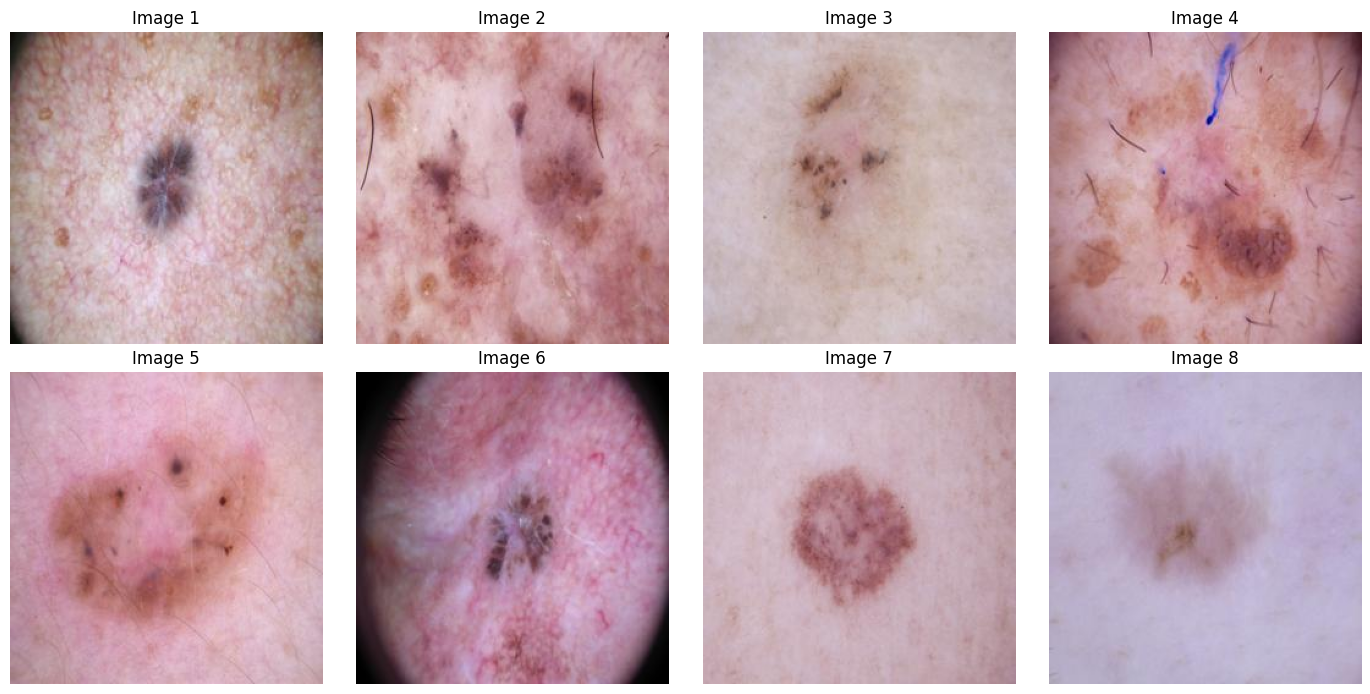


 Size of image:  (256, 256, 3)


In [8]:
# creates a figure with subplots arranged in a 2x4 grid
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'{HOME}/datasets/test/class_1/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()
print("\n Size of image: ", img.shape)

### Setting a Dataloader



The purpose of a **DataLoader** is fundamental in the context of machine learning and deep learning, especially when working with large or complex datasets. `Its main purpose is to facilitate the efficient loading and manipulation of data during model training`.

---
**Transform the dataloaders for data augmentation**

---

In [9]:
from torchvision import datasets, models, transforms

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

---
**Dataloaders**

---

In [10]:
import torch
from torch.utils.data import DataLoader

# Configuraciones
data_dir = f'{HOME}/datasets'
num_classes = 7
batch_size = 32
num_epochs = 100
feature_extract = True # Feature Extract no Fine-Tuning


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size,
                             shuffle=True, num_workers=2)
               for x in ['train', 'val', 'test']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### [ResNet-50](https://wisdomml.in/understanding-resnet-50-in-depth-architecture-skip-connections-and-advantages-over-other-networks/)

ResNet-50 is a deep neural network designed for computer vision tasks, such as image classification. `"ResNet" stands for `**`Residual Network`**`, and "50" indicates that the network is 50 layers deep`.



### What is ResNet-50?

ResNet-50 is part of the ResNet family of models, which were introduced by researchers from Microsoft Research (Kaiming He et al.) in their 2015 paper "[`Deep Residual Learning for Image Recognition`](https://arxiv.org/abs/1512.03385)" This architecture gained fame for its outstanding performance in image classification challenges, such as the ImageNet Large Scale Visual Recognition Challenge (ILSVRC).



### What is the Problem that ResNet-50 Solves?



#### Degradation in Deep Networks

One of the challenges in training very deep neural networks is the **`degradation problem`**. `As networks get deeper, their performance on the training task tends to degrade, not because of overfitting, but due to difficulties in optimizing a deep network, such as vanishing gradients`.



#### Residual Architecture

The key innovation in ResNet-50 is its **residual architecture**, which `introduces the idea of residual or "skip connections." These connections allow the input of one layer to bypass several layers and be added to the output of a later layer`. This makes it easier for the layers to learn an identity function if necessary, enabling the network to learn more complex functions.

Mathematically, instead of a layer learning a function $ H(x) $ directly, it is reformulated so that the layer learns a residual function $ F(x) $, where $ H(x) = F(x) + x $. Here, $ x $ is the original input, and $ F(x) $ is the transformation learned by the intermediate layers.

![residual architecture](https://github.com/JuanZapa7a/Medical-Image-Processing/blob/main/figs/image.png?raw=1)


### Structure of ResNet-50

ResNet-50 is a specific variant with 50 layers, consisting of:
- **`1 initial convolutional layer`** (7x7 convolutions with a stride of 2).
- **`4 main blocks of residual layers`**: Each block has multiple convolutional layers and is where the residual connections are applied. The blocks are organized as follows:
  - Block 1: 3 layers
  - Block 2: 4 layers
  - Block 3: 6 layers
  - Block 4: 3 layers
- **`1 global average pooling layer`** at the end.
- **`1 fully connected layer`** for the final classification.

The network uses **1x1** and **3x3 convolutions** within its blocks, and the inclusion of 1x1 convolutions helps reduce dimensionality, which is crucial for making the network computationally efficient.

![ResNet50 Structure](https://github.com/JuanZapa7a/Medical-Image-Processing/blob/main/figs/image2.png?raw=1)


### Applications

ResNet-50 has become a standard architecture used in many computer vision applications, including:
- **`Image Classification`**: To categorize images into a large number of classes.
- **`Object Detection`**: Used as a backbone in more complex algorithms to locate and classify objects within images.
- **`Image Segmentation`**: As part of pipelines that segment and label each pixel in an image.



### Advantages of ResNet-50

- **`Depth`**: The network is deep enough to capture complex features in images.
- **`Avoids Degradation`**: Thanks to the residual connections, ResNet-50 can be effectively trained even with a large number of layers.
- **`Versatility`**: It has proven to be very versatile and can be used as the basis for many other computer vision tasks.

In summary, ResNet-50 is a powerful and widely used model in the field of computer vision, capable of handling complex classification and detection tasks thanks to its innovative residual architecture.

---
**Initializing a ResNet50 model for transfer learning**

---

This code snippet is setting up a **`transfer learning`**` pipeline using a ResNet50 model in PyTorch`, with an option to perform either `feature extraction` or `fine-tuning`, depending on the `feature_extract` parameter.



### Key Points in the Code Snipet:

1. **`Import Statements`**:
   - `torch.nn as nn`: Importing the `nn` module from PyTorch, which provides various neural network layers and functionalities.
   - `torch.optim as optim`: Importing the `optim` module, which provides various optimization algorithms.
   
2. **`set_parameter_requires_grad` Function**:
   - **`Purpose`**: This function controls whether the gradients for the parameters of the model are computed during training.
   - **`Functionality`**:
     - If `feature_extracting` is `True`, it freezes the model's parameters by setting `param.requires_grad = False`. This means that during backpropagation, the weights of these layers will not be updated.
     - If `feature_extracting` is `False`, the model's parameters will remain trainable, allowing fine-tuning.

3. **`initialize_model` Function**:
   - **`Purpose`**: This function initializes a ResNet50 model with a specified number of output classes and allows for either feature extraction or fine-tuning.
   - **`Parameters`**:
     - `num_classes`: The number of output classes for the classification task.
     - `feature_extract`: A boolean that determines whether to perform feature extraction (True) or fine-tuning (False).
     - `use_pretrained`: A boolean that specifies whether to load a pre-trained version of ResNet50.
   - **`Process`**:
     - It loads a ResNet50 model, with pre-trained weights if `use_pretrained` is `True`.
     - Calls `set_parameter_requires_grad` to freeze or unfreeze the model's parameters based on `feature_extract`.
     - Modifies the final fully connected (FC) layer of the model to match the number of classes specified by `num_classes`. This is necessary because the original ResNet50 model is typically trained on the ImageNet dataset, which has 1000 classes.

4. **`Model Initialization and Transfer to Device`**:
   - `model_ft = initialize_model(num_classes, feature_extract, use_pretrained=True)`: Initializes the model using the specified parameters.
   - `model_ft = model_ft.to(device)`: Transfers the model to the specified computing device (e.g., GPU or CPU).


### **Feature Extraction or Fine-Tuning?**
- **`Transfer Learning`**: The overall process is an example of transfer learning because it involves using a pre-trained model (`ResNet50`) as a starting point for a new task (with a different number of output classes).
- **`Feature Extraction or Fine-Tuning?`**:
  - **`Feature Extraction`**: If `feature_extract` is set to `True`, most of the model's parameters are frozen, and only the parameters of the final fully connected layer are trained. This is a common approach in transfer learning when the pre-trained features are deemed sufficient, and only the classifier needs to be adapted to the new task.
  - **`Fine-Tuning`**: If `feature_extract` is set to `False`, all parameters of the model are updated during training. This is a more intensive form of transfer learning where the model is fine-tuned to better fit the new task.

**`Summary`**: `The code is primarily for `**`transfer learning`**`, with the option to perform either `**`feature extraction`**` (only training the final layer) or `**`fine-tuning`**` (training some/all layers)`.

In [11]:
import torch.nn as nn
import torch.optim as optim

# Parameters of a model require gradient computation during training?
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

# Initializes a ResNet50 model for transfer learning
def initialize_model(num_classes, feature_extract, use_pretrained=True):
    model_ft = models.resnet50(weights=models.ResNet50_Weights.DEFAULT if use_pretrained else None)
    set_parameter_requires_grad(model_ft, feature_extract)
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = nn.Linear(num_ftrs, num_classes)
    return model_ft

model_ft = initialize_model(num_classes, feature_extract, use_pretrained=True)
model_ft = model_ft.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 118MB/s]


---
**Show ResNet50 architecture**

---

In [12]:
!pip install -q torchinfo

In [13]:
import torchinfo

# Print a summary using torchinfo (uncomment for actual output)
torchinfo.summary(model=model_ft,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 7]              --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

## 4. **Train model**

---
**Define loss and optimizer**

---

This code sets up the optimizer for training a deep learning model in PyTorch, specifically the `model_ft` model that was initialized earlier. Below is a detailed explanation of each part of the code:



### 1. **Selecting Parameters to Update**

- **`params_to_update = model_ft.parameters()`**:
  - Initially, it is assumed that all the model's parameters (`model_ft`) will be updated during training. `model_ft.parameters()` returns an iterator over all the model's parameters.

- **Conditional `if feature_extract:`**:
  - If `feature_extract` is `True`, it indicates that **feature extraction** is being performed. In this case, only the parameters of the layers that are not frozen (i.e., those with `requires_grad=True`) will be updated.
  - The line `params_to_update = [param for param in model_ft.parameters() if param.requires_grad]` filters the parameters, creating a list that contains only those parameters with `requires_grad` set to `True`.
  - This is useful when you have opted to freeze the pre-trained layers of the model (using the `set_parameter_requires_grad` function explained earlier) and want to train only the final layer (or layers that have been added or modified).



### 2. **Setting Up the Optimizer**

- **`optim.SGD`**:
  - Here, the **SGD (Stochastic Gradient Descent)** optimizer is being used to train the model. This optimizer is one of the most common techniques for updating the weights of a neural network during training.
  
- **`params_to_update`**:
  - This argument tells the optimizer which parameters should be updated during training. Depending on whether feature extraction or fine-tuning is being performed, this list may include all of the model's parameters or only some of them.
  
- **`lr=0.001`**:
  - The **learning rate** determines the size of the steps the optimizer takes in the direction of the gradient during loss minimization. A small value like `0.001` allows the model to learn more gradually, reducing the risk of skipping important minima in the loss function.
  
- **`momentum=0.9`**:
  - **Momentum** helps accelerate the optimizer in the direction of the gradients and mitigates oscillation. A value of `0.9` is quite common and often improves convergence, especially in deep networks.



### 3. **Setting Up the Loss Function**

- **`nn.CrossEntropyLoss`**:
  - This line defines the **loss function** to be used during training. `CrossEntropyLoss` is a standard loss function for multi-class classification tasks.
  - It combines `LogSoftmax` and `Negative Log Likelihood Loss` into a single function, making it suitable for problems where you need to predict a single class among multiple categories.



### **Summary**

- **`Parameters to Update`**: These are configured to include either all the model’s parameters or only those that have not been frozen, depending on whether feature extraction or fine-tuning is being performed.
- **`Optimizer`**: It is set up to use SGD with a low learning rate and momentum, which is suitable for most deep learning problems.
- **`Loss Function`**: `CrossEntropyLoss` is used, which is ideal for multi-class classification problems.

This configuration is crucial for effective model training, as it determines which parts of the model will be adjusted, how those adjustments will be made, and how the model's performance will be measured during training.

In [14]:
# Configuración del optimizador
params_to_update = model_ft.parameters()
if feature_extract:
    params_to_update = [param for param in model_ft.parameters() if param.requires_grad]

optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()


---

**Define training**

---

In [15]:
from tqdm import tqdm

def train_model(model, dataloaders, criterion, optimizer, num_epochs=num_epochs):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    # Ready to store metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # Use tqdm for the progress bar
            with tqdm(dataloaders[phase], unit="batch") as tepoch:
                for inputs, labels in tepoch:
                    tepoch.set_description(f"Phase {phase} Epoch {epoch+1}/{num_epochs}")

                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    optimizer.zero_grad()

                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                    # Updates progress bar with loss and accuracy
                    tepoch.set_postfix(loss=loss.item(), accuracy=torch.sum(preds == labels.data).item()/inputs.size(0))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

           # Store metrics
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    print(f'Best val Acc: {best_acc:4f}')
    model.load_state_dict(best_model_wts)

    return model, train_losses, val_losses, train_accuracies, val_accuracies

This code defines a function called `train_model` that is used to train a deep learning model in PyTorch. The function handles both the training and validation phases, tracks the performance metrics, and uses the `tqdm` library to display a progress bar during training. Below is a detailed explanation of its purpose and functionality:



### **Purpose of the `train_model` Function**

The primary purpose of this function is `to train a model over a specified number of epochs, evaluate it on a validation set, and return the model with the best validation accuracy`, along with the recorded metrics such as losses and accuracies for both training and validation phases.



### **Key Components and Functionality**

1. **Function Arguments**:
   - `model`: The PyTorch model to be trained.
   - `dataloaders`: A dictionary containing the data loaders for both training (`'train'`) and validation (`'val'`) datasets.
   - `criterion`: The loss function used to calculate the loss during training.
   - `optimizer`: The optimizer used to update the model's parameters.
   - `num_epochs`: The number of epochs to train the model.

2. **Metric Storage**:
   - The function initializes lists (`train_losses`, `val_losses`, `train_accuracies`, `val_accuracies`) to store the loss and accuracy values for each epoch, separately for the training and validation phases.

3. **Training and Validation Loop**:
   - The function loops through the specified number of epochs.
   - For each epoch, it iterates over two phases: `'train'` and `'val'`.
     - **Training Phase** (`phase == 'train'`): The model is set to training mode using `model.train()`, allowing gradients to be computed and the model to be updated.
     - **Validation Phase** (`phase == 'val'`): The model is set to evaluation mode using `model.eval()`, which disables dropout and batch normalization layers and prevents gradient computation.

4. **Progress Bar with `tqdm`**:
   - The `tqdm` library is used to display a progress bar for each epoch. It tracks the progress of the model as it processes batches of data, showing the current loss and accuracy for each batch.

5. **Loss and Accuracy Calculation**:
   - For each batch, the function calculates the loss and the number of correct predictions.
   - The `running_loss` and `running_corrects` variables accumulate these values for the entire phase (training or validation).
   - After processing all batches in a phase, the epoch-level loss and accuracy are calculated by dividing the accumulated values by the total number of data points in the dataset.

6. **Best Model Checkpointing**:
   - The function tracks the best validation accuracy across all epochs. If the current epoch's validation accuracy is the highest seen so far, the model's weights are saved as the best model (`best_model_wts`).

7. **Returning Results**:
   - After all epochs are completed, the function loads the best model's weights (the ones with the highest validation accuracy) into the model.
   - It returns the trained model along with the lists of losses and accuracies for both training and validation, which can be used for further analysis or plotting.



### **Summary**

This function is designed to streamline the training and evaluation of a PyTorch model by:
- Handling the training and validation phases in each epoch.
- Tracking and storing performance metrics.
- Displaying real-time progress with `tqdm`.
- Returning the model with the best validation accuracy along with the recorded metrics.

It's a robust utility for training models and monitoring their performance over time.

---
**Train model**

---

In [16]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Entrenar el modelo
import copy
model_ft, train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model_ft, dataloaders, criterion, optimizer_ft, num_epochs=num_epochs
)

# Guardar el modelo
torch.save(model_ft.state_dict(), 'best_model.pth')

# Evaluar el modelo en el conjunto de prueba
model_ft.eval()
running_corrects = 0

Epoch 1/100
----------


Phase train Epoch 1/100: 100%|██████████| 230/230 [00:39<00:00,  5.75batch/s, accuracy=0.364, loss=1.7]


train Loss: 1.7269 Acc: 0.3967


Phase val Epoch 1/100: 100%|██████████| 33/33 [00:04<00:00,  6.85batch/s, accuracy=0.462, loss=1.56]


val Loss: 1.5786 Acc: 0.4914

Epoch 2/100
----------


Phase train Epoch 2/100: 100%|██████████| 230/230 [00:36<00:00,  6.27batch/s, accuracy=0.591, loss=1.33]


train Loss: 1.4782 Acc: 0.5024


Phase val Epoch 2/100: 100%|██████████| 33/33 [00:04<00:00,  7.30batch/s, accuracy=0.654, loss=1.19]


val Loss: 1.4315 Acc: 0.5248

Epoch 3/100
----------


Phase train Epoch 3/100: 100%|██████████| 230/230 [00:32<00:00,  6.97batch/s, accuracy=0.545, loss=1.24]


train Loss: 1.3816 Acc: 0.5230


Phase val Epoch 3/100: 100%|██████████| 33/33 [00:03<00:00,  8.99batch/s, accuracy=0.538, loss=1.37]


val Loss: 1.3743 Acc: 0.5171

Epoch 4/100
----------


Phase train Epoch 4/100: 100%|██████████| 230/230 [00:31<00:00,  7.19batch/s, accuracy=0.455, loss=1.42]


train Loss: 1.3165 Acc: 0.5351


Phase val Epoch 4/100: 100%|██████████| 33/33 [00:04<00:00,  8.17batch/s, accuracy=0.5, loss=1.35]


val Loss: 1.3209 Acc: 0.5324

Epoch 5/100
----------


Phase train Epoch 5/100: 100%|██████████| 230/230 [00:30<00:00,  7.50batch/s, accuracy=0.636, loss=1.35]


train Loss: 1.2699 Acc: 0.5555


Phase val Epoch 5/100: 100%|██████████| 33/33 [00:04<00:00,  7.43batch/s, accuracy=0.577, loss=1.37]


val Loss: 1.3018 Acc: 0.5267

Epoch 6/100
----------


Phase train Epoch 6/100: 100%|██████████| 230/230 [00:32<00:00,  7.01batch/s, accuracy=0.5, loss=1.36]


train Loss: 1.2493 Acc: 0.5590


Phase val Epoch 6/100: 100%|██████████| 33/33 [00:03<00:00,  9.01batch/s, accuracy=0.5, loss=1.2]


val Loss: 1.2688 Acc: 0.5543

Epoch 7/100
----------


Phase train Epoch 7/100: 100%|██████████| 230/230 [00:31<00:00,  7.32batch/s, accuracy=0.636, loss=1.23]


train Loss: 1.2254 Acc: 0.5626


Phase val Epoch 7/100: 100%|██████████| 33/33 [00:03<00:00,  8.90batch/s, accuracy=0.538, loss=1.13]


val Loss: 1.2514 Acc: 0.5533

Epoch 8/100
----------


Phase train Epoch 8/100: 100%|██████████| 230/230 [00:31<00:00,  7.30batch/s, accuracy=0.773, loss=1.18]


train Loss: 1.2136 Acc: 0.5735


Phase val Epoch 8/100: 100%|██████████| 33/33 [00:04<00:00,  7.18batch/s, accuracy=0.462, loss=1.18]


val Loss: 1.2362 Acc: 0.5695

Epoch 9/100
----------


Phase train Epoch 9/100: 100%|██████████| 230/230 [00:31<00:00,  7.24batch/s, accuracy=0.545, loss=1.14]


train Loss: 1.1837 Acc: 0.5799


Phase val Epoch 9/100: 100%|██████████| 33/33 [00:03<00:00,  8.81batch/s, accuracy=0.538, loss=1.41]


val Loss: 1.2036 Acc: 0.5752

Epoch 10/100
----------


Phase train Epoch 10/100: 100%|██████████| 230/230 [00:32<00:00,  7.09batch/s, accuracy=0.682, loss=0.994]


train Loss: 1.1701 Acc: 0.5824


Phase val Epoch 10/100: 100%|██████████| 33/33 [00:03<00:00,  8.47batch/s, accuracy=0.423, loss=1.36]


val Loss: 1.1899 Acc: 0.5724

Epoch 11/100
----------


Phase train Epoch 11/100: 100%|██████████| 230/230 [00:31<00:00,  7.34batch/s, accuracy=0.773, loss=0.915]


train Loss: 1.1528 Acc: 0.5895


Phase val Epoch 11/100: 100%|██████████| 33/33 [00:04<00:00,  8.04batch/s, accuracy=0.654, loss=0.986]


val Loss: 1.1780 Acc: 0.6010

Epoch 12/100
----------


Phase train Epoch 12/100: 100%|██████████| 230/230 [00:31<00:00,  7.29batch/s, accuracy=0.727, loss=0.952]


train Loss: 1.1446 Acc: 0.5918


Phase val Epoch 12/100: 100%|██████████| 33/33 [00:03<00:00,  8.91batch/s, accuracy=0.731, loss=0.865]


val Loss: 1.1856 Acc: 0.5829

Epoch 13/100
----------


Phase train Epoch 13/100: 100%|██████████| 230/230 [00:32<00:00,  7.03batch/s, accuracy=0.5, loss=1.26]


train Loss: 1.1329 Acc: 0.5967


Phase val Epoch 13/100: 100%|██████████| 33/33 [00:03<00:00,  8.33batch/s, accuracy=0.615, loss=1.13]


val Loss: 1.1645 Acc: 0.5857

Epoch 14/100
----------


Phase train Epoch 14/100: 100%|██████████| 230/230 [00:31<00:00,  7.20batch/s, accuracy=0.636, loss=1.03]


train Loss: 1.1093 Acc: 0.6131


Phase val Epoch 14/100: 100%|██████████| 33/33 [00:03<00:00,  8.43batch/s, accuracy=0.692, loss=0.982]


val Loss: 1.1550 Acc: 0.5905

Epoch 15/100
----------


Phase train Epoch 15/100: 100%|██████████| 230/230 [00:31<00:00,  7.31batch/s, accuracy=0.5, loss=1.48]


train Loss: 1.1051 Acc: 0.6014


Phase val Epoch 15/100: 100%|██████████| 33/33 [00:03<00:00,  8.94batch/s, accuracy=0.692, loss=1.33]


val Loss: 1.1440 Acc: 0.6038

Epoch 16/100
----------


Phase train Epoch 16/100: 100%|██████████| 230/230 [00:31<00:00,  7.31batch/s, accuracy=0.636, loss=1.07]


train Loss: 1.0937 Acc: 0.6154


Phase val Epoch 16/100: 100%|██████████| 33/33 [00:04<00:00,  7.74batch/s, accuracy=0.5, loss=1.26]


val Loss: 1.1460 Acc: 0.5962

Epoch 17/100
----------


Phase train Epoch 17/100: 100%|██████████| 230/230 [00:32<00:00,  7.01batch/s, accuracy=0.545, loss=1.09]


train Loss: 1.0952 Acc: 0.6106


Phase val Epoch 17/100: 100%|██████████| 33/33 [00:03<00:00,  8.89batch/s, accuracy=0.577, loss=1.18]


val Loss: 1.1187 Acc: 0.6095

Epoch 18/100
----------


Phase train Epoch 18/100: 100%|██████████| 230/230 [00:31<00:00,  7.42batch/s, accuracy=0.455, loss=1.29]


train Loss: 1.0756 Acc: 0.6106


Phase val Epoch 18/100: 100%|██████████| 33/33 [00:03<00:00,  8.98batch/s, accuracy=0.538, loss=1.24]


val Loss: 1.1074 Acc: 0.6152

Epoch 19/100
----------


Phase train Epoch 19/100: 100%|██████████| 230/230 [00:31<00:00,  7.32batch/s, accuracy=0.591, loss=1.09]


train Loss: 1.0785 Acc: 0.6141


Phase val Epoch 19/100: 100%|██████████| 33/33 [00:04<00:00,  7.62batch/s, accuracy=0.654, loss=0.987]


val Loss: 1.1113 Acc: 0.6038

Epoch 20/100
----------


Phase train Epoch 20/100: 100%|██████████| 230/230 [00:33<00:00,  6.80batch/s, accuracy=0.591, loss=1.12]


train Loss: 1.0716 Acc: 0.6180


Phase val Epoch 20/100: 100%|██████████| 33/33 [00:03<00:00,  8.77batch/s, accuracy=0.692, loss=1.03]


val Loss: 1.1053 Acc: 0.6086

Epoch 21/100
----------


Phase train Epoch 21/100: 100%|██████████| 230/230 [00:31<00:00,  7.22batch/s, accuracy=0.727, loss=0.958]


train Loss: 1.0636 Acc: 0.6205


Phase val Epoch 21/100: 100%|██████████| 33/33 [00:03<00:00,  8.73batch/s, accuracy=0.731, loss=1.05]


val Loss: 1.0836 Acc: 0.6276

Epoch 22/100
----------


Phase train Epoch 22/100: 100%|██████████| 230/230 [00:32<00:00,  7.16batch/s, accuracy=0.545, loss=1.32]


train Loss: 1.0617 Acc: 0.6264


Phase val Epoch 22/100: 100%|██████████| 33/33 [00:04<00:00,  7.90batch/s, accuracy=0.615, loss=0.98]


val Loss: 1.0922 Acc: 0.6057

Epoch 23/100
----------


Phase train Epoch 23/100: 100%|██████████| 230/230 [00:31<00:00,  7.22batch/s, accuracy=0.591, loss=1.08]


train Loss: 1.0457 Acc: 0.6316


Phase val Epoch 23/100: 100%|██████████| 33/33 [00:03<00:00,  8.88batch/s, accuracy=0.462, loss=1.19]


val Loss: 1.1143 Acc: 0.6086

Epoch 24/100
----------


Phase train Epoch 24/100: 100%|██████████| 230/230 [00:33<00:00,  6.88batch/s, accuracy=0.545, loss=1.31]


train Loss: 1.0485 Acc: 0.6290


Phase val Epoch 24/100: 100%|██████████| 33/33 [00:03<00:00,  8.87batch/s, accuracy=0.462, loss=1.21]


val Loss: 1.0764 Acc: 0.6190

Epoch 25/100
----------


Phase train Epoch 25/100: 100%|██████████| 230/230 [00:31<00:00,  7.28batch/s, accuracy=0.773, loss=1.01]


train Loss: 1.0568 Acc: 0.6249


Phase val Epoch 25/100: 100%|██████████| 33/33 [00:04<00:00,  7.36batch/s, accuracy=0.5, loss=1.09]


val Loss: 1.0769 Acc: 0.6114

Epoch 26/100
----------


Phase train Epoch 26/100: 100%|██████████| 230/230 [00:31<00:00,  7.28batch/s, accuracy=0.682, loss=1.05]


train Loss: 1.0290 Acc: 0.6320


Phase val Epoch 26/100: 100%|██████████| 33/33 [00:03<00:00,  8.84batch/s, accuracy=0.615, loss=1.23]


val Loss: 1.0661 Acc: 0.6181

Epoch 27/100
----------


Phase train Epoch 27/100: 100%|██████████| 230/230 [00:32<00:00,  6.99batch/s, accuracy=0.545, loss=1.18]


train Loss: 1.0314 Acc: 0.6370


Phase val Epoch 27/100: 100%|██████████| 33/33 [00:04<00:00,  7.99batch/s, accuracy=0.654, loss=0.959]


val Loss: 1.0706 Acc: 0.6190

Epoch 28/100
----------


Phase train Epoch 28/100: 100%|██████████| 230/230 [00:32<00:00,  7.19batch/s, accuracy=0.545, loss=1.17]


train Loss: 1.0225 Acc: 0.6404


Phase val Epoch 28/100: 100%|██████████| 33/33 [00:03<00:00,  8.35batch/s, accuracy=0.5, loss=1.18]


val Loss: 1.0489 Acc: 0.6257

Epoch 29/100
----------


Phase train Epoch 29/100: 100%|██████████| 230/230 [00:31<00:00,  7.35batch/s, accuracy=0.773, loss=0.653]


train Loss: 1.0182 Acc: 0.6442


Phase val Epoch 29/100: 100%|██████████| 33/33 [00:03<00:00,  8.98batch/s, accuracy=0.692, loss=1.02]


val Loss: 1.0621 Acc: 0.6295

Epoch 30/100
----------


Phase train Epoch 30/100: 100%|██████████| 230/230 [00:31<00:00,  7.31batch/s, accuracy=0.5, loss=1.12]


train Loss: 1.0142 Acc: 0.6404


Phase val Epoch 30/100: 100%|██████████| 33/33 [00:04<00:00,  7.56batch/s, accuracy=0.5, loss=1.08]


val Loss: 1.0606 Acc: 0.6152

Epoch 31/100
----------


Phase train Epoch 31/100: 100%|██████████| 230/230 [00:32<00:00,  7.10batch/s, accuracy=0.591, loss=1.4]


train Loss: 1.0162 Acc: 0.6390


Phase val Epoch 31/100: 100%|██████████| 33/33 [00:04<00:00,  8.19batch/s, accuracy=0.423, loss=1.22]


val Loss: 1.0575 Acc: 0.6248

Epoch 32/100
----------


Phase train Epoch 32/100: 100%|██████████| 230/230 [00:31<00:00,  7.20batch/s, accuracy=0.591, loss=1.34]


train Loss: 1.0039 Acc: 0.6478


Phase val Epoch 32/100: 100%|██████████| 33/33 [00:03<00:00,  8.87batch/s, accuracy=0.577, loss=0.941]


val Loss: 1.0328 Acc: 0.6267

Epoch 33/100
----------


Phase train Epoch 33/100: 100%|██████████| 230/230 [00:31<00:00,  7.24batch/s, accuracy=0.545, loss=1.07]


train Loss: 1.0111 Acc: 0.6389


Phase val Epoch 33/100: 100%|██████████| 33/33 [00:04<00:00,  7.69batch/s, accuracy=0.654, loss=0.951]


val Loss: 1.0538 Acc: 0.6267

Epoch 34/100
----------


Phase train Epoch 34/100: 100%|██████████| 230/230 [00:32<00:00,  6.98batch/s, accuracy=0.773, loss=0.658]


train Loss: 1.0051 Acc: 0.6388


Phase val Epoch 34/100: 100%|██████████| 33/33 [00:03<00:00,  8.65batch/s, accuracy=0.808, loss=0.812]


val Loss: 1.0468 Acc: 0.6210

Epoch 35/100
----------


Phase train Epoch 35/100: 100%|██████████| 230/230 [00:31<00:00,  7.35batch/s, accuracy=0.773, loss=0.833]


train Loss: 1.0091 Acc: 0.6433


Phase val Epoch 35/100: 100%|██████████| 33/33 [00:03<00:00,  8.83batch/s, accuracy=0.577, loss=1.02]


val Loss: 1.0310 Acc: 0.6257

Epoch 36/100
----------


Phase train Epoch 36/100: 100%|██████████| 230/230 [00:31<00:00,  7.25batch/s, accuracy=0.636, loss=1.21]


train Loss: 0.9892 Acc: 0.6510


Phase val Epoch 36/100: 100%|██████████| 33/33 [00:04<00:00,  7.92batch/s, accuracy=0.385, loss=1.63]


val Loss: 1.0249 Acc: 0.6286

Epoch 37/100
----------


Phase train Epoch 37/100: 100%|██████████| 230/230 [00:32<00:00,  7.03batch/s, accuracy=0.636, loss=0.963]


train Loss: 0.9905 Acc: 0.6493


Phase val Epoch 37/100: 100%|██████████| 33/33 [00:04<00:00,  7.24batch/s, accuracy=0.538, loss=1.22]


val Loss: 1.0290 Acc: 0.6352

Epoch 38/100
----------


Phase train Epoch 38/100: 100%|██████████| 230/230 [00:31<00:00,  7.31batch/s, accuracy=0.727, loss=0.923]


train Loss: 0.9783 Acc: 0.6490


Phase val Epoch 38/100: 100%|██████████| 33/33 [00:03<00:00,  8.96batch/s, accuracy=0.423, loss=1.22]


val Loss: 1.0278 Acc: 0.6229

Epoch 39/100
----------


Phase train Epoch 39/100: 100%|██████████| 230/230 [00:31<00:00,  7.34batch/s, accuracy=0.591, loss=1.19]


train Loss: 0.9859 Acc: 0.6476


Phase val Epoch 39/100: 100%|██████████| 33/33 [00:03<00:00,  8.88batch/s, accuracy=0.692, loss=0.953]


val Loss: 1.0176 Acc: 0.6324

Epoch 40/100
----------


Phase train Epoch 40/100: 100%|██████████| 230/230 [00:32<00:00,  7.18batch/s, accuracy=0.818, loss=0.639]


train Loss: 0.9879 Acc: 0.6497


Phase val Epoch 40/100: 100%|██████████| 33/33 [00:04<00:00,  7.53batch/s, accuracy=0.615, loss=0.94]


val Loss: 1.0229 Acc: 0.6362

Epoch 41/100
----------


Phase train Epoch 41/100: 100%|██████████| 230/230 [00:33<00:00,  6.93batch/s, accuracy=0.591, loss=0.875]


train Loss: 0.9823 Acc: 0.6522


Phase val Epoch 41/100: 100%|██████████| 33/33 [00:03<00:00,  8.86batch/s, accuracy=0.692, loss=0.912]


val Loss: 1.0221 Acc: 0.6267

Epoch 42/100
----------


Phase train Epoch 42/100: 100%|██████████| 230/230 [00:31<00:00,  7.33batch/s, accuracy=0.591, loss=0.994]


train Loss: 0.9842 Acc: 0.6522


Phase val Epoch 42/100: 100%|██████████| 33/33 [00:03<00:00,  8.69batch/s, accuracy=0.538, loss=1.09]


val Loss: 1.0301 Acc: 0.6381

Epoch 43/100
----------


Phase train Epoch 43/100: 100%|██████████| 230/230 [00:31<00:00,  7.23batch/s, accuracy=0.682, loss=1.09]


train Loss: 0.9842 Acc: 0.6491


Phase val Epoch 43/100: 100%|██████████| 33/33 [00:04<00:00,  7.62batch/s, accuracy=0.577, loss=1.28]


val Loss: 1.0352 Acc: 0.6267

Epoch 44/100
----------


Phase train Epoch 44/100: 100%|██████████| 230/230 [00:33<00:00,  6.94batch/s, accuracy=0.591, loss=1.17]


train Loss: 0.9669 Acc: 0.6577


Phase val Epoch 44/100: 100%|██████████| 33/33 [00:03<00:00,  8.79batch/s, accuracy=0.462, loss=1.22]


val Loss: 1.0165 Acc: 0.6295

Epoch 45/100
----------


Phase train Epoch 45/100: 100%|██████████| 230/230 [00:31<00:00,  7.33batch/s, accuracy=0.5, loss=1.23]


train Loss: 0.9644 Acc: 0.6630


Phase val Epoch 45/100: 100%|██████████| 33/33 [00:03<00:00,  8.80batch/s, accuracy=0.731, loss=1.02]


val Loss: 1.0040 Acc: 0.6467

Epoch 46/100
----------


Phase train Epoch 46/100: 100%|██████████| 230/230 [00:31<00:00,  7.19batch/s, accuracy=0.682, loss=0.988]


train Loss: 0.9582 Acc: 0.6629


Phase val Epoch 46/100: 100%|██████████| 33/33 [00:04<00:00,  7.71batch/s, accuracy=0.615, loss=1.17]


val Loss: 1.0245 Acc: 0.6371

Epoch 47/100
----------


Phase train Epoch 47/100: 100%|██████████| 230/230 [00:31<00:00,  7.26batch/s, accuracy=0.591, loss=1.17]


train Loss: 0.9544 Acc: 0.6569


Phase val Epoch 47/100: 100%|██████████| 33/33 [00:04<00:00,  7.98batch/s, accuracy=0.692, loss=0.932]


val Loss: 1.0083 Acc: 0.6362

Epoch 48/100
----------


Phase train Epoch 48/100: 100%|██████████| 230/230 [00:32<00:00,  6.98batch/s, accuracy=0.591, loss=1.08]


train Loss: 0.9619 Acc: 0.6589


Phase val Epoch 48/100: 100%|██████████| 33/33 [00:04<00:00,  7.23batch/s, accuracy=0.654, loss=1.06]


val Loss: 0.9983 Acc: 0.6390

Epoch 49/100
----------


Phase train Epoch 49/100: 100%|██████████| 230/230 [00:31<00:00,  7.25batch/s, accuracy=0.591, loss=1.19]


train Loss: 0.9594 Acc: 0.6616


Phase val Epoch 49/100: 100%|██████████| 33/33 [00:03<00:00,  8.71batch/s, accuracy=0.808, loss=0.79]


val Loss: 1.0089 Acc: 0.6295

Epoch 50/100
----------


Phase train Epoch 50/100: 100%|██████████| 230/230 [00:32<00:00,  7.18batch/s, accuracy=0.636, loss=0.967]


train Loss: 0.9570 Acc: 0.6567


Phase val Epoch 50/100: 100%|██████████| 33/33 [00:03<00:00,  8.79batch/s, accuracy=0.538, loss=1.19]


val Loss: 1.0172 Acc: 0.6229

Epoch 51/100
----------


Phase train Epoch 51/100: 100%|██████████| 230/230 [00:34<00:00,  6.76batch/s, accuracy=0.591, loss=0.944]


train Loss: 0.9474 Acc: 0.6599


Phase val Epoch 51/100: 100%|██████████| 33/33 [00:03<00:00,  8.44batch/s, accuracy=0.769, loss=0.693]


val Loss: 1.0182 Acc: 0.6286

Epoch 52/100
----------


Phase train Epoch 52/100: 100%|██████████| 230/230 [00:32<00:00,  7.17batch/s, accuracy=0.727, loss=0.97]


train Loss: 0.9454 Acc: 0.6650


Phase val Epoch 52/100: 100%|██████████| 33/33 [00:03<00:00,  8.79batch/s, accuracy=0.808, loss=0.876]


val Loss: 1.0047 Acc: 0.6410

Epoch 53/100
----------


Phase train Epoch 53/100: 100%|██████████| 230/230 [00:32<00:00,  7.14batch/s, accuracy=0.636, loss=1.09]


train Loss: 0.9531 Acc: 0.6618


Phase val Epoch 53/100: 100%|██████████| 33/33 [00:04<00:00,  7.64batch/s, accuracy=0.808, loss=0.777]


val Loss: 1.0102 Acc: 0.6314

Epoch 54/100
----------


Phase train Epoch 54/100: 100%|██████████| 230/230 [00:33<00:00,  6.91batch/s, accuracy=0.727, loss=0.754]


train Loss: 0.9533 Acc: 0.6578


Phase val Epoch 54/100: 100%|██████████| 33/33 [00:03<00:00,  8.78batch/s, accuracy=0.654, loss=1.07]


val Loss: 1.0090 Acc: 0.6362

Epoch 55/100
----------


Phase train Epoch 55/100: 100%|██████████| 230/230 [00:31<00:00,  7.28batch/s, accuracy=0.773, loss=1]


train Loss: 0.9413 Acc: 0.6648


Phase val Epoch 55/100: 100%|██████████| 33/33 [00:03<00:00,  8.79batch/s, accuracy=0.577, loss=1.04]


val Loss: 1.0048 Acc: 0.6352

Epoch 56/100
----------


Phase train Epoch 56/100: 100%|██████████| 230/230 [00:32<00:00,  7.12batch/s, accuracy=0.636, loss=0.952]


train Loss: 0.9427 Acc: 0.6604


Phase val Epoch 56/100: 100%|██████████| 33/33 [00:04<00:00,  7.53batch/s, accuracy=0.577, loss=0.935]


val Loss: 0.9950 Acc: 0.6362

Epoch 57/100
----------


Phase train Epoch 57/100: 100%|██████████| 230/230 [00:31<00:00,  7.22batch/s, accuracy=0.727, loss=0.913]


train Loss: 0.9290 Acc: 0.6705


Phase val Epoch 57/100: 100%|██████████| 33/33 [00:04<00:00,  7.40batch/s, accuracy=0.692, loss=0.937]


val Loss: 1.0121 Acc: 0.6381

Epoch 58/100
----------


Phase train Epoch 58/100: 100%|██████████| 230/230 [00:31<00:00,  7.25batch/s, accuracy=0.727, loss=0.813]


train Loss: 0.9351 Acc: 0.6669


Phase val Epoch 58/100: 100%|██████████| 33/33 [00:04<00:00,  7.96batch/s, accuracy=0.654, loss=1.02]


val Loss: 1.0007 Acc: 0.6286

Epoch 59/100
----------


Phase train Epoch 59/100: 100%|██████████| 230/230 [00:31<00:00,  7.20batch/s, accuracy=0.773, loss=0.733]


train Loss: 0.9292 Acc: 0.6683


Phase val Epoch 59/100: 100%|██████████| 33/33 [00:03<00:00,  8.34batch/s, accuracy=0.808, loss=0.719]


val Loss: 1.0030 Acc: 0.6410

Epoch 60/100
----------


Phase train Epoch 60/100: 100%|██████████| 230/230 [00:31<00:00,  7.26batch/s, accuracy=0.591, loss=1.15]


train Loss: 0.9305 Acc: 0.6672


Phase val Epoch 60/100: 100%|██████████| 33/33 [00:03<00:00,  8.79batch/s, accuracy=0.577, loss=1.09]


val Loss: 0.9904 Acc: 0.6467

Epoch 61/100
----------


Phase train Epoch 61/100: 100%|██████████| 230/230 [00:32<00:00,  7.00batch/s, accuracy=0.545, loss=1.15]


train Loss: 0.9326 Acc: 0.6663


Phase val Epoch 61/100: 100%|██████████| 33/33 [00:04<00:00,  7.22batch/s, accuracy=0.692, loss=0.853]


val Loss: 0.9880 Acc: 0.6505

Epoch 62/100
----------


Phase train Epoch 62/100: 100%|██████████| 230/230 [00:31<00:00,  7.29batch/s, accuracy=0.773, loss=0.808]


train Loss: 0.9249 Acc: 0.6754


Phase val Epoch 62/100: 100%|██████████| 33/33 [00:03<00:00,  8.85batch/s, accuracy=0.692, loss=0.788]


val Loss: 0.9805 Acc: 0.6343

Epoch 63/100
----------


Phase train Epoch 63/100: 100%|██████████| 230/230 [00:31<00:00,  7.26batch/s, accuracy=0.727, loss=0.893]


train Loss: 0.9249 Acc: 0.6733


Phase val Epoch 63/100: 100%|██████████| 33/33 [00:03<00:00,  8.57batch/s, accuracy=0.462, loss=1.16]


val Loss: 0.9981 Acc: 0.6248

Epoch 64/100
----------


Phase train Epoch 64/100: 100%|██████████| 230/230 [00:33<00:00,  6.88batch/s, accuracy=0.818, loss=0.595]


train Loss: 0.9314 Acc: 0.6698


Phase val Epoch 64/100: 100%|██████████| 33/33 [00:04<00:00,  7.89batch/s, accuracy=0.769, loss=0.774]


val Loss: 0.9947 Acc: 0.6248

Epoch 65/100
----------


Phase train Epoch 65/100: 100%|██████████| 230/230 [00:31<00:00,  7.20batch/s, accuracy=0.864, loss=0.606]


train Loss: 0.9331 Acc: 0.6634


Phase val Epoch 65/100: 100%|██████████| 33/33 [00:03<00:00,  8.83batch/s, accuracy=0.5, loss=1.24]


val Loss: 0.9846 Acc: 0.6371

Epoch 66/100
----------


Phase train Epoch 66/100: 100%|██████████| 230/230 [00:32<00:00,  7.17batch/s, accuracy=0.727, loss=0.738]


train Loss: 0.9236 Acc: 0.6747


Phase val Epoch 66/100: 100%|██████████| 33/33 [00:04<00:00,  7.68batch/s, accuracy=0.692, loss=1.02]


val Loss: 1.0118 Acc: 0.6438

Epoch 67/100
----------


Phase train Epoch 67/100: 100%|██████████| 230/230 [00:32<00:00,  7.13batch/s, accuracy=0.591, loss=1.11]


train Loss: 0.9172 Acc: 0.6721


Phase val Epoch 67/100: 100%|██████████| 33/33 [00:04<00:00,  8.08batch/s, accuracy=0.577, loss=1.11]


val Loss: 0.9817 Acc: 0.6514

Epoch 68/100
----------


Phase train Epoch 68/100: 100%|██████████| 230/230 [00:32<00:00,  7.12batch/s, accuracy=0.818, loss=0.749]


train Loss: 0.9162 Acc: 0.6731


Phase val Epoch 68/100: 100%|██████████| 33/33 [00:03<00:00,  8.67batch/s, accuracy=0.538, loss=1.11]


val Loss: 0.9796 Acc: 0.6362

Epoch 69/100
----------


Phase train Epoch 69/100: 100%|██████████| 230/230 [00:31<00:00,  7.28batch/s, accuracy=0.909, loss=0.55]


train Loss: 0.9201 Acc: 0.6673


Phase val Epoch 69/100: 100%|██████████| 33/33 [00:04<00:00,  7.23batch/s, accuracy=0.692, loss=1.02]


val Loss: 0.9964 Acc: 0.6371

Epoch 70/100
----------


Phase train Epoch 70/100: 100%|██████████| 230/230 [00:31<00:00,  7.19batch/s, accuracy=0.727, loss=0.846]


train Loss: 0.9117 Acc: 0.6735


Phase val Epoch 70/100: 100%|██████████| 33/33 [00:03<00:00,  8.82batch/s, accuracy=0.654, loss=0.991]


val Loss: 0.9881 Acc: 0.6419

Epoch 71/100
----------


Phase train Epoch 71/100: 100%|██████████| 230/230 [00:33<00:00,  6.95batch/s, accuracy=0.636, loss=1.1]


train Loss: 0.9169 Acc: 0.6683


Phase val Epoch 71/100: 100%|██████████| 33/33 [00:03<00:00,  8.73batch/s, accuracy=0.692, loss=0.759]


val Loss: 0.9727 Acc: 0.6410

Epoch 72/100
----------


Phase train Epoch 72/100: 100%|██████████| 230/230 [00:32<00:00,  7.05batch/s, accuracy=0.955, loss=0.566]


train Loss: 0.9045 Acc: 0.6766


Phase val Epoch 72/100: 100%|██████████| 33/33 [00:04<00:00,  7.60batch/s, accuracy=0.615, loss=1.14]


val Loss: 0.9694 Acc: 0.6429

Epoch 73/100
----------


Phase train Epoch 73/100: 100%|██████████| 230/230 [00:31<00:00,  7.28batch/s, accuracy=0.5, loss=1.15]


train Loss: 0.9194 Acc: 0.6695


Phase val Epoch 73/100: 100%|██████████| 33/33 [00:03<00:00,  8.77batch/s, accuracy=0.654, loss=0.908]


val Loss: 0.9944 Acc: 0.6314

Epoch 74/100
----------


Phase train Epoch 74/100: 100%|██████████| 230/230 [00:33<00:00,  6.97batch/s, accuracy=0.818, loss=0.907]


train Loss: 0.9196 Acc: 0.6746


Phase val Epoch 74/100: 100%|██████████| 33/33 [00:04<00:00,  8.11batch/s, accuracy=0.615, loss=1.03]


val Loss: 0.9876 Acc: 0.6276

Epoch 75/100
----------


Phase train Epoch 75/100: 100%|██████████| 230/230 [00:31<00:00,  7.26batch/s, accuracy=0.5, loss=1.38]


train Loss: 0.9152 Acc: 0.6729


Phase val Epoch 75/100: 100%|██████████| 33/33 [00:04<00:00,  8.24batch/s, accuracy=0.654, loss=0.815]


val Loss: 0.9856 Acc: 0.6400

Epoch 76/100
----------


Phase train Epoch 76/100: 100%|██████████| 230/230 [00:31<00:00,  7.31batch/s, accuracy=0.773, loss=0.918]


train Loss: 0.9090 Acc: 0.6761


Phase val Epoch 76/100: 100%|██████████| 33/33 [00:03<00:00,  8.71batch/s, accuracy=0.615, loss=1.03]


val Loss: 0.9726 Acc: 0.6495

Epoch 77/100
----------


Phase train Epoch 77/100: 100%|██████████| 230/230 [00:31<00:00,  7.22batch/s, accuracy=0.455, loss=1.14]


train Loss: 0.9198 Acc: 0.6667


Phase val Epoch 77/100: 100%|██████████| 33/33 [00:04<00:00,  7.07batch/s, accuracy=0.846, loss=0.71]


val Loss: 0.9763 Acc: 0.6314

Epoch 78/100
----------


Phase train Epoch 78/100: 100%|██████████| 230/230 [00:32<00:00,  7.13batch/s, accuracy=0.682, loss=0.666]


train Loss: 0.9129 Acc: 0.6781


Phase val Epoch 78/100: 100%|██████████| 33/33 [00:04<00:00,  7.85batch/s, accuracy=0.615, loss=0.956]


val Loss: 0.9545 Acc: 0.6524

Epoch 79/100
----------


Phase train Epoch 79/100: 100%|██████████| 230/230 [00:32<00:00,  7.17batch/s, accuracy=0.773, loss=0.924]


train Loss: 0.8979 Acc: 0.6807


Phase val Epoch 79/100: 100%|██████████| 33/33 [00:03<00:00,  8.65batch/s, accuracy=0.654, loss=0.932]


val Loss: 0.9958 Acc: 0.6552

Epoch 80/100
----------


Phase train Epoch 80/100: 100%|██████████| 230/230 [00:32<00:00,  7.07batch/s, accuracy=0.773, loss=0.737]


train Loss: 0.9037 Acc: 0.6776


Phase val Epoch 80/100: 100%|██████████| 33/33 [00:04<00:00,  7.35batch/s, accuracy=0.731, loss=0.965]


val Loss: 0.9823 Acc: 0.6505

Epoch 81/100
----------


Phase train Epoch 81/100: 100%|██████████| 230/230 [00:33<00:00,  6.89batch/s, accuracy=0.682, loss=0.933]


train Loss: 0.9062 Acc: 0.6716


Phase val Epoch 81/100: 100%|██████████| 33/33 [00:04<00:00,  7.86batch/s, accuracy=0.769, loss=0.839]


val Loss: 0.9808 Acc: 0.6486

Epoch 82/100
----------


Phase train Epoch 82/100: 100%|██████████| 230/230 [00:32<00:00,  7.17batch/s, accuracy=0.773, loss=0.916]


train Loss: 0.9131 Acc: 0.6752


Phase val Epoch 82/100: 100%|██████████| 33/33 [00:03<00:00,  8.82batch/s, accuracy=0.731, loss=0.843]


val Loss: 0.9993 Acc: 0.6190

Epoch 83/100
----------


Phase train Epoch 83/100: 100%|██████████| 230/230 [00:31<00:00,  7.32batch/s, accuracy=0.636, loss=0.981]


train Loss: 0.8939 Acc: 0.6844


Phase val Epoch 83/100: 100%|██████████| 33/33 [00:04<00:00,  8.10batch/s, accuracy=0.615, loss=0.913]


val Loss: 0.9835 Acc: 0.6362

Epoch 84/100
----------


Phase train Epoch 84/100: 100%|██████████| 230/230 [00:33<00:00,  6.93batch/s, accuracy=0.909, loss=0.595]


train Loss: 0.9052 Acc: 0.6767


Phase val Epoch 84/100: 100%|██████████| 33/33 [00:03<00:00,  8.58batch/s, accuracy=0.462, loss=1.13]


val Loss: 0.9838 Acc: 0.6429

Epoch 85/100
----------


Phase train Epoch 85/100: 100%|██████████| 230/230 [00:31<00:00,  7.31batch/s, accuracy=0.682, loss=0.781]


train Loss: 0.9065 Acc: 0.6816


Phase val Epoch 85/100: 100%|██████████| 33/33 [00:03<00:00,  8.75batch/s, accuracy=0.615, loss=0.958]


val Loss: 0.9680 Acc: 0.6476

Epoch 86/100
----------


Phase train Epoch 86/100: 100%|██████████| 230/230 [00:31<00:00,  7.26batch/s, accuracy=0.636, loss=0.812]


train Loss: 0.8911 Acc: 0.6833


Phase val Epoch 86/100: 100%|██████████| 33/33 [00:04<00:00,  7.75batch/s, accuracy=0.615, loss=0.891]


val Loss: 0.9704 Acc: 0.6381

Epoch 87/100
----------


Phase train Epoch 87/100: 100%|██████████| 230/230 [00:31<00:00,  7.24batch/s, accuracy=0.727, loss=0.914]


train Loss: 0.8825 Acc: 0.6897


Phase val Epoch 87/100: 100%|██████████| 33/33 [00:03<00:00,  8.72batch/s, accuracy=0.654, loss=0.846]


val Loss: 0.9690 Acc: 0.6457

Epoch 88/100
----------


Phase train Epoch 88/100: 100%|██████████| 230/230 [00:33<00:00,  6.94batch/s, accuracy=0.5, loss=1.17]


train Loss: 0.8963 Acc: 0.6860


Phase val Epoch 88/100: 100%|██████████| 33/33 [00:03<00:00,  8.66batch/s, accuracy=0.654, loss=0.837]


val Loss: 0.9783 Acc: 0.6295

Epoch 89/100
----------


Phase train Epoch 89/100: 100%|██████████| 230/230 [00:31<00:00,  7.23batch/s, accuracy=0.636, loss=0.997]


train Loss: 0.8877 Acc: 0.6833


Phase val Epoch 89/100: 100%|██████████| 33/33 [00:04<00:00,  7.27batch/s, accuracy=0.654, loss=0.874]


val Loss: 0.9853 Acc: 0.6533

Epoch 90/100
----------


Phase train Epoch 90/100: 100%|██████████| 230/230 [00:31<00:00,  7.19batch/s, accuracy=0.818, loss=0.789]


train Loss: 0.9020 Acc: 0.6776


Phase val Epoch 90/100: 100%|██████████| 33/33 [00:03<00:00,  8.72batch/s, accuracy=0.615, loss=0.876]


val Loss: 0.9649 Acc: 0.6381

Epoch 91/100
----------


Phase train Epoch 91/100: 100%|██████████| 230/230 [00:33<00:00,  6.88batch/s, accuracy=0.773, loss=0.786]


train Loss: 0.8857 Acc: 0.6807


Phase val Epoch 91/100: 100%|██████████| 33/33 [00:03<00:00,  8.79batch/s, accuracy=0.538, loss=1.09]


val Loss: 0.9702 Acc: 0.6400

Epoch 92/100
----------


Phase train Epoch 92/100: 100%|██████████| 230/230 [00:32<00:00,  7.11batch/s, accuracy=0.682, loss=0.861]


train Loss: 0.8898 Acc: 0.6867


Phase val Epoch 92/100: 100%|██████████| 33/33 [00:04<00:00,  8.01batch/s, accuracy=0.538, loss=1.11]


val Loss: 0.9618 Acc: 0.6400

Epoch 93/100
----------


Phase train Epoch 93/100: 100%|██████████| 230/230 [00:33<00:00,  6.95batch/s, accuracy=0.682, loss=1.01]


train Loss: 0.8927 Acc: 0.6807


Phase val Epoch 93/100: 100%|██████████| 33/33 [00:04<00:00,  8.20batch/s, accuracy=0.577, loss=1.25]


val Loss: 0.9671 Acc: 0.6524

Epoch 94/100
----------


Phase train Epoch 94/100: 100%|██████████| 230/230 [00:33<00:00,  6.78batch/s, accuracy=0.818, loss=0.767]


train Loss: 0.8804 Acc: 0.6903


Phase val Epoch 94/100: 100%|██████████| 33/33 [00:03<00:00,  8.65batch/s, accuracy=0.5, loss=1.31]


val Loss: 0.9611 Acc: 0.6533

Epoch 95/100
----------


Phase train Epoch 95/100: 100%|██████████| 230/230 [00:32<00:00,  7.13batch/s, accuracy=0.682, loss=0.895]


train Loss: 0.8883 Acc: 0.6816


Phase val Epoch 95/100: 100%|██████████| 33/33 [00:04<00:00,  7.75batch/s, accuracy=0.577, loss=1.05]


val Loss: 0.9560 Acc: 0.6486

Epoch 96/100
----------


Phase train Epoch 96/100: 100%|██████████| 230/230 [00:31<00:00,  7.22batch/s, accuracy=0.636, loss=0.977]


train Loss: 0.8868 Acc: 0.6781


Phase val Epoch 96/100: 100%|██████████| 33/33 [00:04<00:00,  8.23batch/s, accuracy=0.808, loss=0.791]


val Loss: 0.9594 Acc: 0.6486

Epoch 97/100
----------


Phase train Epoch 97/100: 100%|██████████| 230/230 [00:33<00:00,  6.93batch/s, accuracy=0.818, loss=0.743]


train Loss: 0.8781 Acc: 0.6841


Phase val Epoch 97/100: 100%|██████████| 33/33 [00:03<00:00,  8.81batch/s, accuracy=0.654, loss=0.853]


val Loss: 0.9648 Acc: 0.6486

Epoch 98/100
----------


Phase train Epoch 98/100: 100%|██████████| 230/230 [00:31<00:00,  7.31batch/s, accuracy=0.773, loss=0.869]


train Loss: 0.8918 Acc: 0.6797


Phase val Epoch 98/100: 100%|██████████| 33/33 [00:03<00:00,  8.40batch/s, accuracy=0.577, loss=1.02]


val Loss: 0.9460 Acc: 0.6533

Epoch 99/100
----------


Phase train Epoch 99/100: 100%|██████████| 230/230 [00:31<00:00,  7.21batch/s, accuracy=0.727, loss=0.828]


train Loss: 0.8889 Acc: 0.6846


Phase val Epoch 99/100: 100%|██████████| 33/33 [00:04<00:00,  7.83batch/s, accuracy=0.692, loss=0.766]


val Loss: 0.9523 Acc: 0.6486

Epoch 100/100
----------


Phase train Epoch 100/100: 100%|██████████| 230/230 [00:31<00:00,  7.25batch/s, accuracy=0.591, loss=1.07]


train Loss: 0.8828 Acc: 0.6864


Phase val Epoch 100/100: 100%|██████████| 33/33 [00:03<00:00,  8.59batch/s, accuracy=0.462, loss=1.34]


val Loss: 0.9685 Acc: 0.6390

Best val Acc: 0.655238


---
**Display the metrics curves model**

---

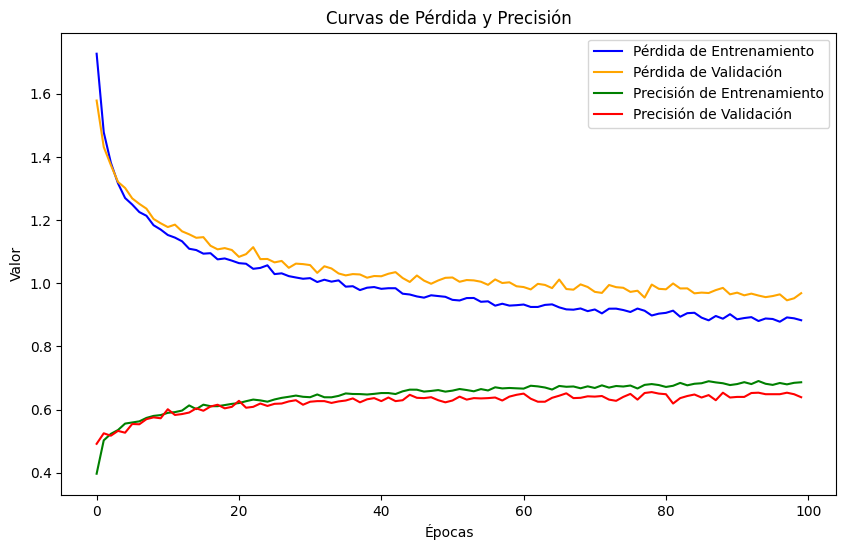

In [17]:
import matplotlib.pyplot as plt

# Crear un solo subplot en una figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las curvas de pérdida
ax.plot(train_losses, label="Pérdida de Entrenamiento", color='blue')
ax.plot(val_losses, label="Pérdida de Validación", color='orange')

# Graficar las curvas de precisión
ax.plot(train_accuracies, label="Precisión de Entrenamiento", color='green')
ax.plot(val_accuracies, label="Precisión de Validación", color='red')

# Títulos y etiquetas
ax.set_title("Curvas de Pérdida y Precisión")
ax.set_xlabel("Épocas")
ax.set_ylabel("Valor")
ax.legend()

# Mostrar la gráfica
plt.show()


## 5. **Validate our model**

---
**Validation metrics**

---

This code is designed to evaluate a trained deep learning model's performance on a test dataset using various metrics and visualizations. It performs the following steps: evaluates the model, calculates accuracy, generates a classification report, creates a confusion matrix, and plots ROC curves for a multiclass classification problem.


In [18]:
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np # Import the NumPy library

# Set the model to evaluation mode
model_ft.eval()

all_predictions = []
all_labels = []
all_probs = []  # Store probabilities for ROC curve

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_ft(inputs)

        probs = F.softmax(outputs, dim=1)  # Get probabilities
        _, predicted = torch.max(probs, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())


### **Key Components and Functionality**

1. **`Setting the Model to Evaluation Mode`**:
   
   - The model is set to evaluation mode using `model_ft.eval()`. This ensures that layers like dropout and batch normalization behave correctly during evaluation, i.e., they don’t introduce randomness as they might during training.

2. **`Making Predictions and Storing Results`**:

   - These lists are initialized to store the predicted labels, true labels, and the predicted probabilities for each class, which will be used later for various evaluations.
   - The code iterates through the test data using `torch.no_grad()` to disable gradient computation (not needed during evaluation), making the process faster and using less memory.



Accuracy: 58.57%
              precision    recall  f1-score   support

     class_0       0.62      0.43      0.51        30
     class_1       0.45      0.63      0.53        30
     class_2       0.50      0.47      0.48        30
     class_3       0.68      0.50      0.58        30
     class_4       0.44      0.40      0.42        30
     class_5       0.59      0.87      0.70        30
     class_6       0.92      0.80      0.86        30

    accuracy                           0.59       210
   macro avg       0.60      0.59      0.58       210
weighted avg       0.60      0.59      0.58       210



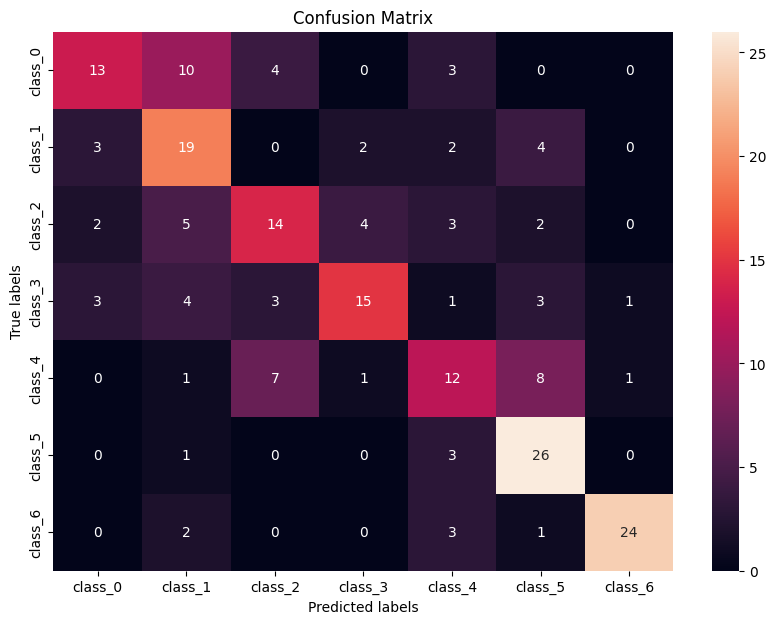

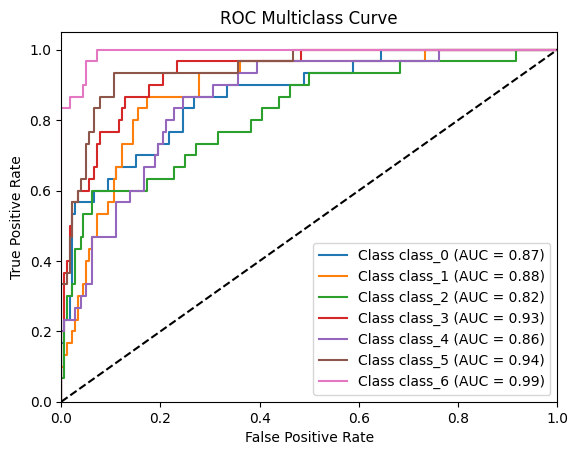

In [19]:
# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print(classification_report(all_labels, all_predictions, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ROC Multiclass Curve
y_test_bin = label_binarize(all_labels, classes=range(num_classes))
y_score = np.array(all_probs)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Multiclass Curve')
plt.legend(loc="lower right")
plt.show()

## 6. **Predictions** (inference)

---
**Display predictions**

---

This code is designed `to visualize a batch of images from a test dataset along with their true labels and predicted labels after running them through a pre-trained model`. It uses Matplotlib for displaying the images in a grid format, which makes it easier to inspect the model's predictions visually.


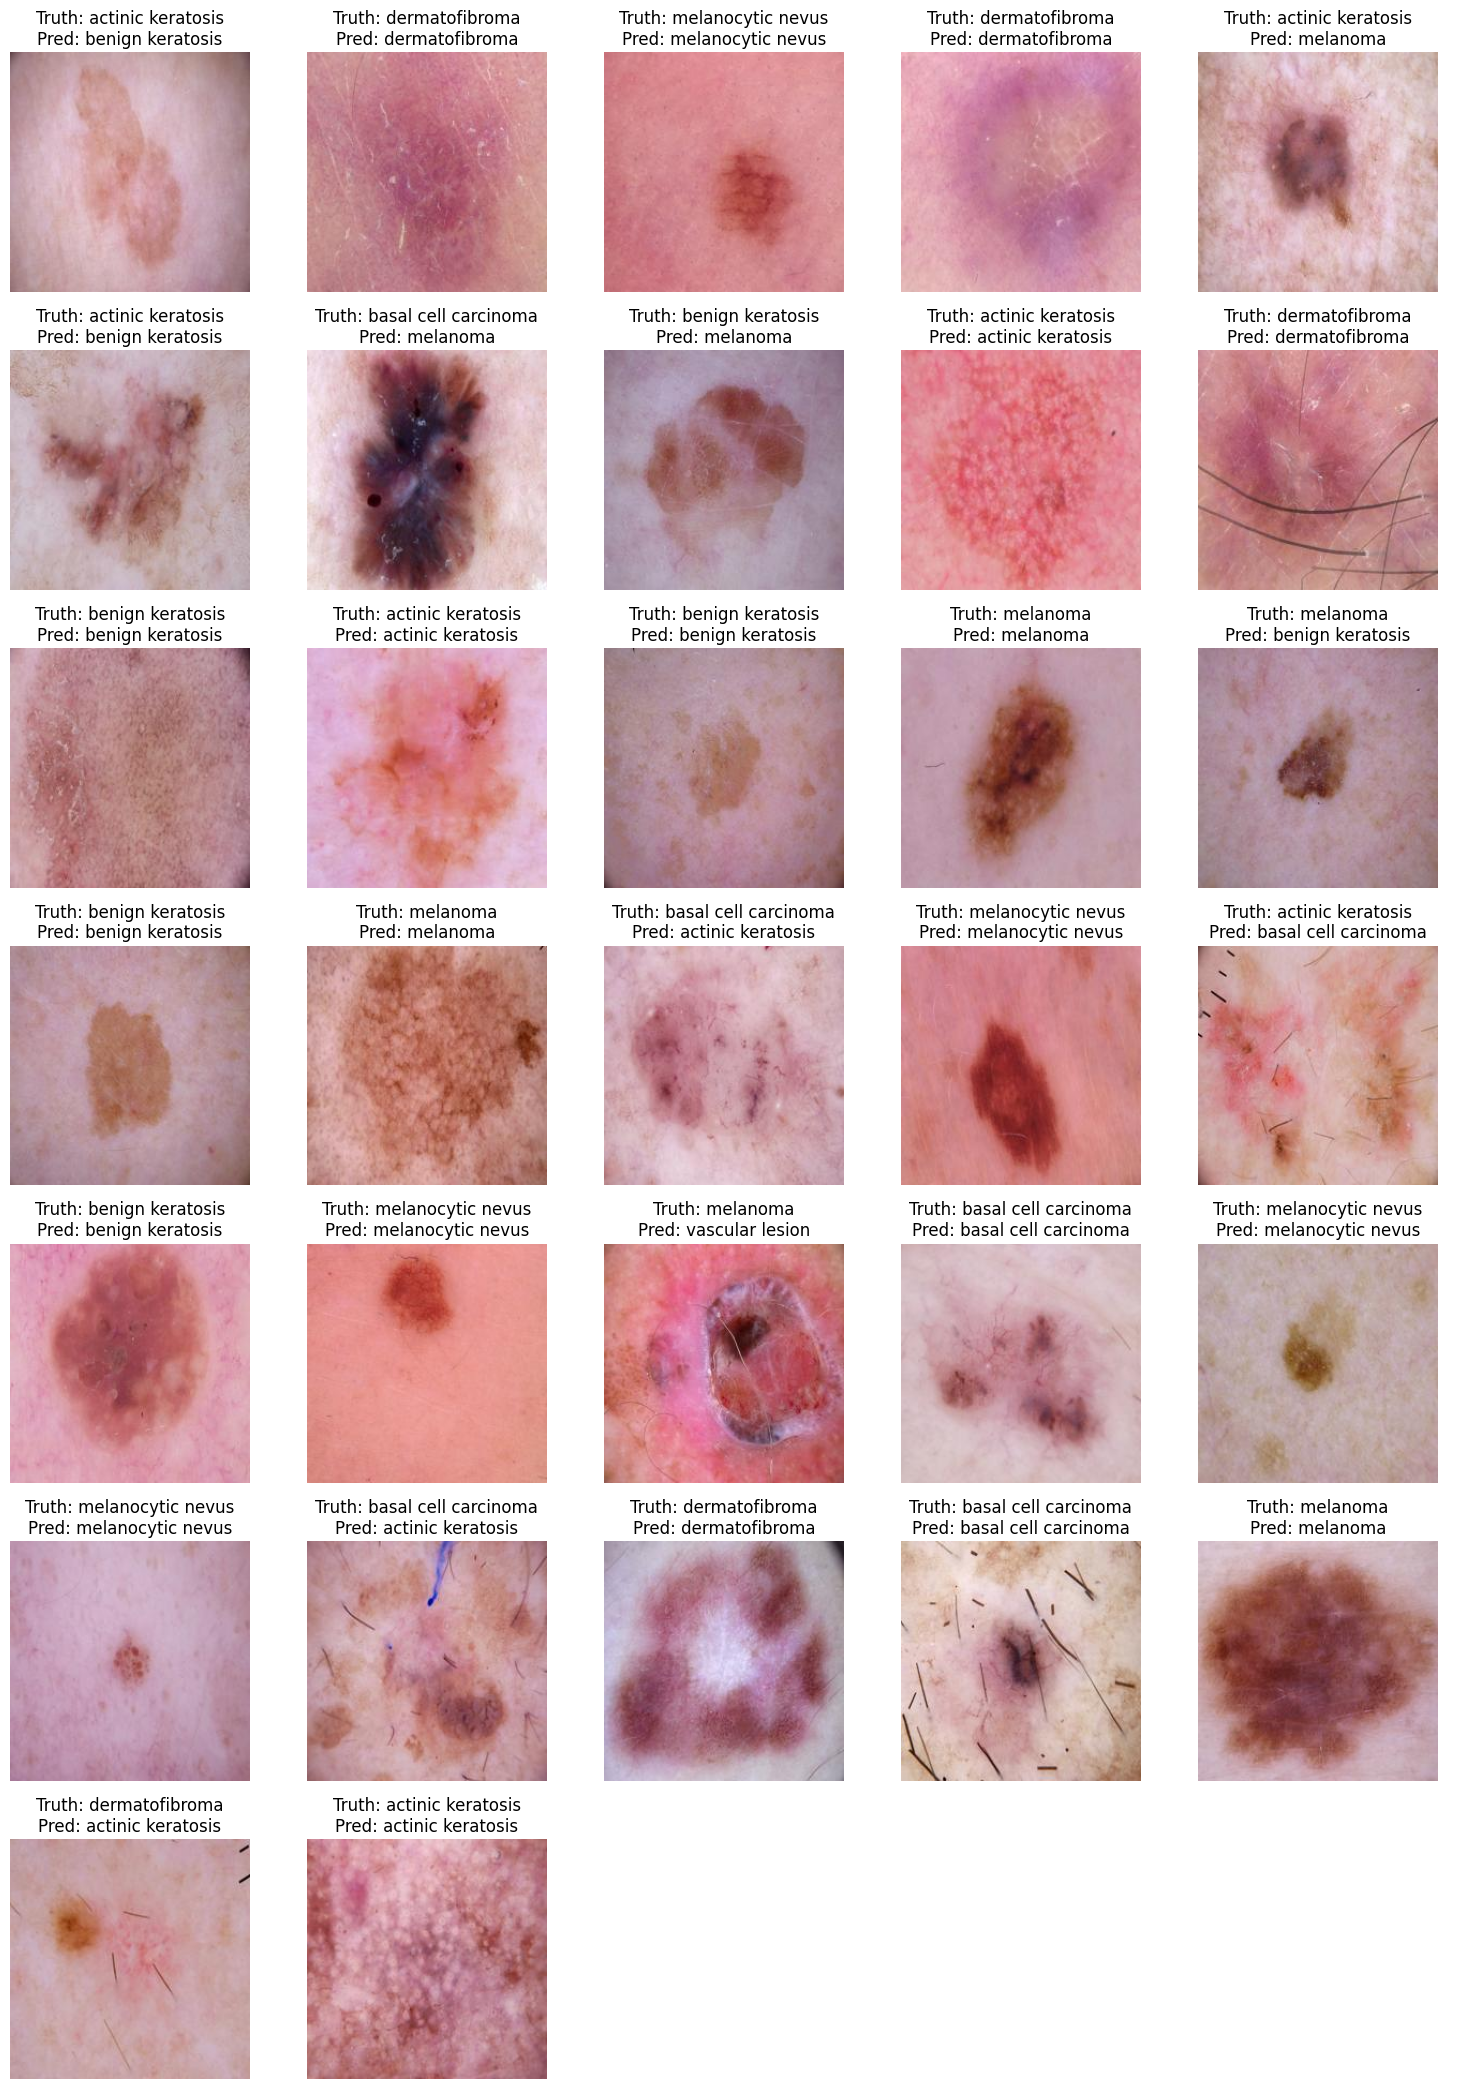

In [20]:
import matplotlib.pyplot as plt

# Define class names
class_names = ['actinic keratosis', 'basal cell carcinoma', 'benign keratosis',
               'dermatofibroma', 'melanoma', 'melanocytic nevus', 'vascular lesion']

# Get a batch of images
data_iter = iter(dataloaders['test'])
images, labels = next(data_iter)

# Move to CPU if necessary
images = images.cpu()
labels = labels.cpu()

# Get predictions
model_ft.eval()
with torch.no_grad():
    outputs = model_ft(images.to(device))
    _, predicted = torch.max(outputs, 1)
predicted = predicted.cpu()

# Display images with labels and predictions
num_images = len(images)  # Number of images in the batch
num_cols = 5  # Adjust the number of columns as needed
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

for i in range(num_images):
    row = i // num_cols
    col = i % num_cols
    image = images[i]
    label = labels[i]
    pred = predicted[i]

    # Denormalize image if necessary (assuming normalization was applied during preprocessing)
    # Replace with your normalization values if different
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    image = image * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

    # Convert image to numpy and transpose for display
    image_np = image.numpy().transpose((1, 2, 0))

    axes[row, col].imshow(image_np)
    axes[row, col].set_title(f"Truth: {class_names[label]}\nPred: {class_names[pred]}")
    axes[row, col].axis('off')

# Hide any unused subplots
for i in range(num_images, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


### **Key Components and Functionality**

1. **`Class Names Definition`**:

   - A list of class names corresponding to the different categories that the model can predict. These names will be used to label the images with their true and predicted classes.

2. **`Getting a Batch of Images`**:

   - The code retrieves a batch of images and their corresponding labels from the test data loader. This batch will be used for visualizing the model’s predictions.

3. **`Preparing the Images and Labels`**:

   - If the images and labels were originally on the GPU, they are moved to the CPU for further processing and visualization.

4. **`Making Predictions`**:
  
   - The model is set to evaluation mode (`model_ft.eval()`), ensuring no gradients are calculated or any layers like dropout behave differently.
   - Predictions are made on the batch of images, and the predicted labels are obtained using `torch.max()`, which identifies the class with the highest predicted probability.

5. **`Visualizing the Images`**:
   - **Subplot Creation**:
    
     - The code dynamically creates a grid of subplots to display the images. The number of rows is calculated based on the total number of images and the desired number of columns.

   - **Denormalization** (if necessary):
     
     - If the images were normalized during preprocessing, they are denormalized before being displayed. This step ensures that the images appear in their original color space rather than in a normalized form.

   - **Image Display**:
     
     - The images are converted to NumPy arrays and transposed to match the format expected by Matplotlib (`height x width x channels`).
     - Each image is displayed with a title indicating the true label and the predicted label.

   - **Handling Unused Subplots**:
    
     - If there are more subplots than images, the unused subplots are hidden to make the visualization cleaner.

6. **`Displaying the Visualization`**:
  
   - Finally, the layout of the subplots is adjusted to prevent overlap, and the grid of images is displayed using `plt.show()`.



### **Summary**

This code is a visualization utility that:
- **Displays a batch of images** from the test dataset.
- **Shows both the true and predicted labels** for each image, allowing you to visually inspect the model's performance.
- **Handles denormalization** if the images were normalized during preprocessing, ensuring they are displayed correctly.
- **Uses a dynamic grid layout** to arrange the images neatly in a grid, adjusting the number of rows based on the number of images.

This is particularly useful for quickly assessing how well the model is performing on specific examples and identifying patterns or issues in its predictions.

## `NoteBook Practice 10`

---
Modify the notebook as necessary to improve the performance parameters of your transfer learning. Try to use a metric that combines the partial metrics to show that your model classifies better than the baseline model shown in this notebook. What you can modify includes:

---

### Instructions in order to improve the Notebook (Use these suggestions as needed):

ChatGPT can be your great allied. Use it for your convenence.

Several deep learning models are well-suited for transfer learning in PyTorch, particularly for image classification tasks. These models have been pre-trained on large datasets like ImageNet and can be fine-tuned for specific tasks. Here are some popular choices:

### 1. **VGG (e.g., VGG16, VGG19)**
   - **Description**: VGG models are simple yet powerful convolutional networks with a series of convolutional layers followed by fully connected layers. They are known for their uniform architecture with 3x3 convolution filters.
   - **Use Case**: VGG models are effective for image classification tasks and can be easily fine-tuned for new datasets.
   - **PyTorch**: Available in `torchvision.models` as `vgg16` and `vgg19`.

### 2. **ResNet (e.g., ResNet18, ResNet34, ResNet50, ResNet101, ResNet152)**
   - **Description**: As previously discussed, ResNet models are built using residual connections, which help in training very deep networks by preventing the degradation problem.
   - **Use Case**: ResNet models are highly versatile and commonly used for various image classification tasks, with deeper variants offering more complex feature extraction.
   - **PyTorch**: Available in `torchvision.models` as `resnet18`, `resnet34`, `resnet50`, etc.

### 3. **Inception (e.g., Inception v3)**
   - **Description**: Inception models use a more complex architecture with modules that apply convolutions of different sizes in parallel, capturing multi-scale features efficiently.
   - **Use Case**: Inception models are particularly good for image classification tasks where multi-scale feature learning is beneficial.
   - **PyTorch**: Available in `torchvision.models` as `inception_v3`.

### 4. **DenseNet (e.g., DenseNet121, DenseNet169, DenseNet201)**
   - **Description**: DenseNet models connect each layer to every other layer in a feed-forward fashion. This dense connectivity pattern leads to efficient feature reuse and helps mitigate the vanishing gradient problem.
   - **Use Case**: DenseNet models are effective for tasks requiring fine-grained feature extraction and are often used for image classification and segmentation.
   - **PyTorch**: Available in `torchvision.models` as `densenet121`, `densenet169`, etc.

### 5. **MobileNet (e.g., MobileNetV2, MobileNetV3)**
   - **Description**: MobileNet models are designed for efficiency, with a focus on reducing the number of parameters and computational cost, making them suitable for mobile and embedded applications.
   - **Use Case**: Ideal for deploying classification models on devices with limited resources.
   - **PyTorch**: Available in `torchvision.models` as `mobilenet_v2` and `mobilenet_v3_large`.

### 6. **EfficientNet (e.g., EfficientNetB0 to EfficientNetB7)**
   - **Description**: EfficientNet models optimize both the depth, width, and resolution of the network through a compound scaling method. They are known for achieving high accuracy with fewer parameters.
   - **Use Case**: EfficientNet models are great for image classification tasks that require a balance between accuracy and computational efficiency.
   - **PyTorch**: Available via third-party libraries like `efficientnet_pytorch`.

### 7. **AlexNet**
   - **Description**: One of the earliest deep convolutional networks that popularized deep learning, AlexNet has a simpler architecture but still serves as a good starting point for basic image classification tasks.
   - **Use Case**: Suitable for smaller datasets or educational purposes in transfer learning.
   - **PyTorch**: Available in `torchvision.models` as `alexnet`.

### 8. **SqueezeNet**
   - **Description**: SqueezeNet is a lightweight model designed to achieve AlexNet-level accuracy with significantly fewer parameters, making it suitable for deployment in resource-constrained environments.
   - **Use Case**: Ideal for scenarios where model size and inference speed are critical, such as on mobile or embedded devices.
   - **PyTorch**: Available in `torchvision.models` as `squeezenet1_0` and `squeezenet1_1`.

### 9. **Vision Transformer (ViT)**
   - **Description**: The Vision Transformer model applies the transformer architecture, originally designed for NLP, to image classification tasks. It divides images into patches and processes them as sequences, similar to words in text.
   - **Use Case**: ViT models are cutting-edge for image classification and can outperform traditional CNNs in some scenarios, particularly with large datasets.
   - **PyTorch**: Available through third-party libraries or by using implementations in `timm`.

### 10. **RegNet**
   - **Description**: RegNet models are a family of network designs discovered through neural architecture search (NAS). They offer a good trade-off between efficiency and accuracy across various model sizes.
   - **Use Case**: Useful for high-performance image classification with optimized computation.
   - **PyTorch**: Available in `torchvision.models` as `regnet_y_400mf`, `regnet_y_800mf`, etc.

These models can be easily loaded and fine-tuned using PyTorch's `torchvision.models` module or other specialized libraries. Fine-tuning typically involves replacing the final fully connected layer with one tailored to the new classification task and training the model on the new dataset.

Anyway, feel free to modify and adapt the exercise as needed to suit your learning objectives and preferences.

Happy coding!